###### Jodi Thomas
DA 320
Assignment - Week 5 - Detecting Outliers

In [64]:
import pandas as pd
import json
import pandas as pd
import certifi
from matplotlib import pyplot
import numpy as np

###### Read this data from a CSV file

In [65]:
metacritic = pd.read_csv("C:\DA 320\Week 5\imdb.csv")

In [66]:
# Show a few columns of data
metacritic.head()

,title,runtime,release_date,budget
0,Grease,110.0,6/13/1978,6000000.0
1,Superman,143.0,12/10/1978,55000000.0
2,The Deer Hunter,183.0,12/8/1978,15000000.0
3,Halloween,91.0,10/25/1978,300000.0
4,National Lampoon's Animal House,109.0,7/27/1978,3000000.0


In [67]:
metacritic = pd.DataFrame(cursor)
metacritic.tail()

""


###### Retrieve connection strings, passwords, or secrets from a JSON file

In [68]:
import json

# Demonstration of how to Load a file that contains secrets without accidentally leaking those secrets
with open('C:\\DA 320\\Week 5\\Secrets.json') as f:
    data = json.load(f)
    
    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key = data['MongoDB']
    
# We can sargly print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 69 characters in length.


###### Connect to a MongoDB Server

In [69]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [70]:
import pymongo


In [71]:
# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 5.0.13.
This database has the collections ['MetaCritic', 'IMDBSuperHero']


###### Fetch IMDB collection from a MongoDB Server

In [72]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["IMDBSuperHero"].find()

# Convert this information into a Pandas dataframe
metacritic = pd.DataFrame(cursor)

# Make sure we've read the information correctly
metacritic.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634c834926915564d61f3b18,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,634c834926915564d61f3b19,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,634c834926915564d61f3b22,11354364,Reveal,130,4.6,1508,NaN,11/29/2019,NULL,NULL,NULL,"Mystery, Thriller","Aadhya Aaradhana, Advith Narayanankutty, Sudha...",Murali .S.V.,Jayasudha K.,Sri Manjunatha Cine Combines
3,634c834926915564d61f3b30,77369,Convoy,110,6.3,16757,PG,6/10/1978,12000000,NULL,NULL,"Action, Drama","Kris Kristofferson, Ali MacGraw, Ernest Borgni...",Sam Peckinpah,"Michael Deeley, Michael Friedman, Robert M. Sh...","EMI Films, Robert M. Sherman Productions"
4,634c834926915564d61f3b31,78446,Up in Smoke,86,6.9,38390,R,8/11/1978,2000000,NULL,NULL,"Comedy, Music","Cheech Marin, Tommy Chong, Strother Martin, Ed...","Lou Adler, Tommy Chong","Lou Adler, John Beug, Lou Lombardo",Paramount Pictures


###### Convert Data - release_date to date, budget to numeric, runtime to numeric

In [73]:
# Transform and standarize the columns
metacritic.release_date=pd.to_datetime(metacritic.release_date,errors = 'coerce')
metacritic.budget = pd.to_numeric(metacritic.budget, errors='coerce')
metacritic.runtime=pd.to_numeric(metacritic.runtime,errors='coerce')
# checking result
metacritic.head()
                

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634c834926915564d61f3b18,77631,Grease,110.0,7.2,265183,TV-14::(D),1978-06-13,6000000.0,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,634c834926915564d61f3b19,78346,Superman,143.0,7.4,172769,TV-PG::(LV),1978-12-10,55000000.0,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,634c834926915564d61f3b22,11354364,Reveal,130.0,4.6,1508,NaN,2019-11-29,NaN,NULL,NULL,"Mystery, Thriller","Aadhya Aaradhana, Advith Narayanankutty, Sudha...",Murali .S.V.,Jayasudha K.,Sri Manjunatha Cine Combines
3,634c834926915564d61f3b30,77369,Convoy,110.0,6.3,16757,PG,1978-06-10,12000000.0,NULL,NULL,"Action, Drama","Kris Kristofferson, Ali MacGraw, Ernest Borgni...",Sam Peckinpah,"Michael Deeley, Michael Friedman, Robert M. Sh...","EMI Films, Robert M. Sherman Productions"
4,634c834926915564d61f3b31,78446,Up in Smoke,86.0,6.9,38390,R,1978-08-11,2000000.0,NULL,NULL,"Comedy, Music","Cheech Marin, Tommy Chong, Strother Martin, Ed...","Lou Adler, Tommy Chong","Lou Adler, John Beug, Lou Lombardo",Paramount Pictures


###### Plotting friendly currency numbers

In [74]:
from matplotlib import pyplot

def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

###### Plotting Runtime against Release Date 

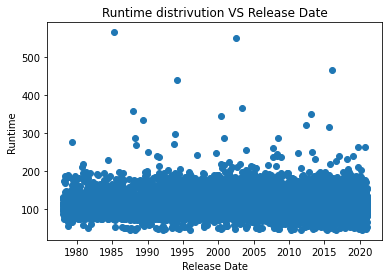

In [75]:
pyplot.title('Runtime distrivution VS Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(metacritic['release_date'], metacritic['runtime'])
pyplot.show()

###### Top outliers for Budget

In [76]:
metacritic.sort_values("budget", ascending = False).head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
21734,634c835326915564d61f8f4f,3921314,Muhammad: The Messenger of God,162.0,7.2,10764,NULL,2015-02-01,1.200000e+11,NULL,NULL,"Biography, Drama, History","Mahdi Pakdel, Sareh Bayat, Mina Sadati, Ali Re...",Majid Majidi,"Muhammad Mehdi Heidarian, Majid Majidi, Farzad...",Nourtaban Film Industry
17102,634c835226915564d61f7efe,3131744,Deportees 3,112.0,2.4,1631,NaN,2011-03-17,5.900000e+10,NULL,NULL,"Action, Comedy, Drama","Akbar Abdi, Armin Alavi, Kamand Amirsoleimani,...",Masoud Dehnamaki,"Saeed Bagheri, Masoud Dehnamaki, Mohamad Reza ...",", , , ,"
28125,634c835626915564d61fa966,11296132,The Singer,107.0,4.5,1594,NaN,2019-11-06,5.500000e+10,NULL,NULL,"Comedy, Drama, Music, Romance","Ziba Hajian, Parviz Parastui, Elnaz Shakerdoos...",Mostafa Kiayee,"Shahin Fardtombekiyan, Mostafa Kiayee","Filmiran, HA International, Karen Film"
25926,634c835526915564d61fa094,8116428,Along With the Gods: The Last 49 Days,142.0,7.1,7171,Not Rated,2018-08-01,3.500000e+10,NULL,NULL,"Action, Drama, Fantasy","Ha Jung-woo, Ju Ji-Hoon, Hyang-gi Kim, Ma Dong...",Yong-hwa Kim,"Ji-sun Choi, Won Dong-Yeon, Yong-hwa Kim, Daes...","Dexter Studios, Realies Pictures"
27627,634c835626915564d61fa587,8237172,Gundala,123.0,6.1,4892,TV-14,2019-08-29,3.000000e+10,NULL,NULL,"Action, Adventure, Drama, Sci-Fi","Abimana Aryasatya, Tara Basro, Bront Palarae, ...",Joko Anwar,"Wim Berlinawan, Andi Boediman, Bismarka Kurnia...","Screenplay Films, Bumilangit Studios, Legacy P..."


###### This was a challenging, yet fun assignment, and I learned lots of new aspects with Jupyter Notebook and MongoDB that I never knew before.  I found analyzing the dataset in Excel to be benefcial for me, considering there are sort features to use to quickly identify the outliers.  Here are some of my findings: 1) Outliers for Runtime: Null values resulted for rows 29420-29444, which would need to be researched since ther should be at least some runtime value.  2) Outliers for Release Date:  I didn't find anything odd here; the oldest release date was Jan. 1 1978 and the latest release date is Dec. 28, 2020. 3) Outliers for Budget:  This is the area I found the most Null values, 16636 to be exact.  There were many records where the budget was in the trillions, which would need to be researched.  It was noted in Office Hours that these movie have a foreign currency, which would answer the high budget amount. 